# LSTM Time Series Forecasting Tutorial in Python, Tensorflow and Keras

* Univariate
https://www.youtube.com/watch?v=c0k-YLQGKjY


* Multivariate
https://www.youtube.com/watch?v=kGdbPnMCdOg

In [ ]:
!pip install tensorflow pandas numpy matplotlib sklearn

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from pathlib import Path


2022-02-19 13:16:57.330515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-19 13:16:57.330545: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.shape

(420551, 15)

In [5]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [6]:
# only use a portion of the data
# take every hour
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
df.shape

(70091, 15)

In [8]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [9]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [11]:
# for this example only use a single column

<AxesSubplot:xlabel='Date Time'>

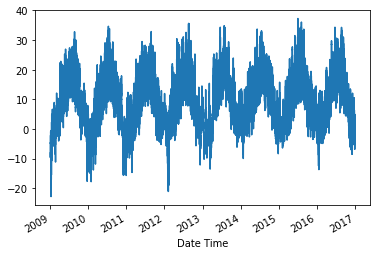

In [14]:
temp = df['T (degC)']
temp.plot()

In [15]:
def df_to_X_y(df, window_size=5):
    # window_size is the number of samples to take
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [16]:
WINDOW_SIZE=5
X,y = df_to_X_y(temp, WINDOW_SIZE)

In [17]:
X.shape

(70086, 5, 1)

In [18]:
y.shape

(70086,)

In [19]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]



In [20]:
X_train.shape, X_val.shape, X_test.shape

((60000, 5, 1), (5000, 5, 1), (5086, 5, 1))

In [21]:
y_train.shape, y_val.shape, y_test.shape

((60000,), (5000,), (5086,))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [24]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))


2022-02-19 13:54:17.954028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-19 13:54:17.954061: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-19 13:54:17.954085: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-02-19 13:54:17.954340: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [26]:
cp = ModelCheckpoint('model1/', save_best_only=True)


In [27]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1861/1875 [============================>.] - ETA: 0s - loss: 35.8288 - root_mean_squared_error: 5.9857

2022-02-19 13:58:11.572428: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 35.5874 - root_mean_squared_error: 5.9655 - val_loss: 1.2233 - val_root_mean_squared_error: 1.1060
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 1.8887 - root_mean_squared_error: 1.3743

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 1.8881 - root_mean_squared_error: 1.3741 - val_loss: 0.6302 - val_root_mean_squared_error: 0.7939
Epoch 3/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.9107 - root_mean_squared_error: 0.9543

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.9111 - root_mean_squared_error: 0.9545 - val_loss: 0.5524 - val_root_mean_squared_error: 0.7432
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.7380 - root_mean_squared_error: 0.8591

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7381 - root_mean_squared_error: 0.8591 - val_loss: 0.5234 - val_root_mean_squared_error: 0.7234
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6834 - root_mean_squared_error: 0.8267

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6828 - root_mean_squared_error: 0.8263 - val_loss: 0.5159 - val_root_mean_squared_error: 0.7183
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6639 - root_mean_squared_error: 0.8148

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6639 - root_mean_squared_error: 0.8148 - val_loss: 0.5013 - val_root_mean_squared_error: 0.7081
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6556 - root_mean_squared_error: 0.8097

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6564 - root_mean_squared_error: 0.8102 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7058
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6506 - root_mean_squared_error: 0.8066 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068
Epoch 9/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.6477 - root_mean_squared_error: 0.8048

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6477 - root_mean_squared_error: 0.8048 - val_loss: 0.4908 - val_root_mean_squared_error: 0.7005
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.5137 - val_root_mean_squared_error: 0.7167


In [30]:
model1.history

In [34]:
losses = pd.DataFrame(model1.history.history)
losses.head()


,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,35.587391,5.965517,1.223281,1.106020
1,1.888077,1.374073,0.630226,0.793868
2,0.911103,0.954517,0.552420,0.743249
3,0.738126,0.859143,0.523367,0.723441
4,0.682813,0.826325,0.515908,0.718267


<AxesSubplot:>

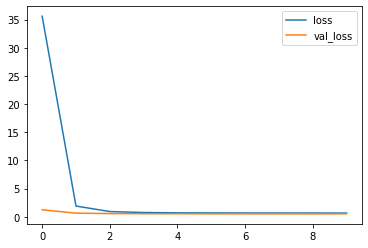

In [35]:
# losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [36]:
# load best model
from tensorflow.keras.models import load_model

In [37]:
model1 = load_model('model1/')

In [38]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train}) 

In [39]:
train_results

,Train Predictions,Actuals
0,-9.884558,-9.67
1,-9.720004,-9.17
2,-8.839842,-8.10
3,-7.411562,-7.66
4,-7.280581,-7.04
...,...,...
59995,6.059855,6.07
59996,7.156456,9.88
59997,12.114364,13.53
59998,16.049517,15.43


In [40]:
# plotting

In [41]:
import matplotlib.pyplot as plt

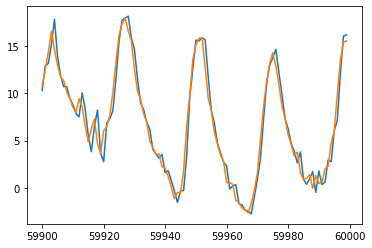

In [48]:
plt.plot(train_results['Train Predictions'][-100:])
plt.plot(train_results['Actuals'][-100:])

In [49]:
# Look at validation

In [50]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val}) 

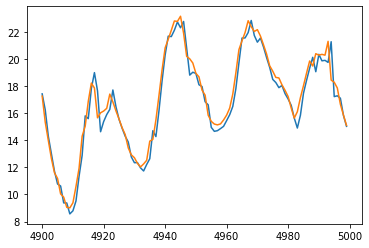

In [51]:
plt.plot(val_results['Val Predictions'][-100:])
plt.plot(val_results['Actuals'][-100:])

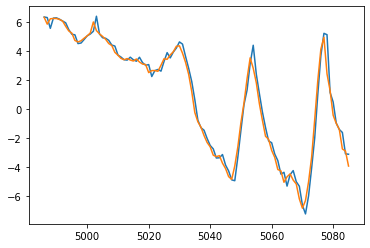

In [52]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test}) 
plt.plot(test_results['Test Predictions'][-100:])
plt.plot(test_results['Actuals'][-100:])

In [ ]:
# part 2 - multivariate

In [56]:
from sklearn.metrics import mean_squared_error as mse

In [57]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y,predictions)

(      Predictions  Actuals
 0       14.349796    13.99
 1       13.234242    13.46
 2       12.823734    12.93
 3       12.414831    12.43
 4       11.985056    12.17
 ...           ...      ...
 5081    -0.954487    -0.98
 5082    -1.400376    -1.40
 5083    -1.607586    -2.75
 5084    -3.083943    -2.89
 5085    -3.111995    -3.93
 
 [5086 rows x 2 columns],
 0.66138852049766)

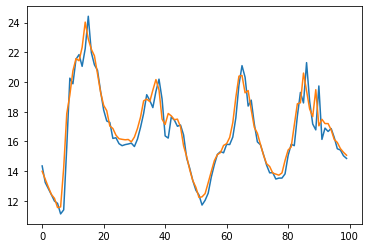

In [58]:
plot_predictions(model1, X_test, y_test)

In [59]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(5,1)))  # 5,1 where '1' means univariate
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))


In [60]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [61]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [62]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])



Epoch 1/10
1842/1875 [============================>.] - ETA: 0s - loss: 13.3474 - root_mean_squared_error: 3.6534INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 13.1711 - root_mean_squared_error: 3.6292 - val_loss: 2.1415 - val_root_mean_squared_error: 1.4634
Epoch 2/10
1842/1875 [============================>.] - ETA: 0s - loss: 1.2205 - root_mean_squared_error: 1.1048INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.2164 - root_mean_squared_error: 1.1029 - val_loss: 0.6904 - val_root_mean_squared_error: 0.8309
Epoch 3/10
1841/1875 [============================>.] - ETA: 0s - loss: 0.8384 - root_mean_squared_error: 0.9157INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.8396 - root_mean_squared_error: 0.9163 - val_loss: 0.5974 - val_root_mean_squared_error: 0.7729
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7631 - root_mean_squared_error: 0.8736 - val_loss: 0.6038 - val_root_mean_squared_error: 0.7770
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.7380 - root_mean_squared_error: 0.8591INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7376 - root_mean_squared_error: 0.8589 - val_loss: 0.5716 - val_root_mean_squared_error: 0.7560
Epoch 6/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.7297 - root_mean_squared_error: 0.8543INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7293 - root_mean_squared_error: 0.8540 - val_loss: 0.5450 - val_root_mean_squared_error: 0.7382
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7221 - root_mean_squared_error: 0.8498 - val_loss: 0.5474 - val_root_mean_squared_error: 0.7399
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7173 - root_mean_squared_error: 0.8469 - val_loss: 0.5944 - val_root_mean_squared_error: 0.7710
Epoch 9/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.7160 - root_mean_squared_error: 0.8462INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7161 - root_mean_squared_error: 0.8462 - val_loss: 0.5333 - val_root_mean_squared_error: 0.7303
Epoch 10/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7105 - root_mean_squared_error: 0.8429INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7117 - root_mean_squared_error: 0.8436 - val_loss: 0.5320 - val_root_mean_squared_error: 0.7294


In [63]:
# Use GRU

In [64]:
model3 = Sequential()
model3.add(InputLayer(input_shape=(5,1)))  # 5,1 where '1' means univariate
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [65]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])


Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 24.8393 - root_mean_squared_error: 4.9839

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 11s 5ms/step - loss: 24.7009 - root_mean_squared_error: 4.9700 - val_loss: 1.0094 - val_root_mean_squared_error: 1.0047
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.6106 - root_mean_squared_error: 1.2691

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 1.6088 - root_mean_squared_error: 1.2684 - val_loss: 0.6036 - val_root_mean_squared_error: 0.7769
Epoch 3/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.8294 - root_mean_squared_error: 0.9107

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.8284 - root_mean_squared_error: 0.9102 - val_loss: 0.5328 - val_root_mean_squared_error: 0.7299
Epoch 4/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6970 - root_mean_squared_error: 0.8349

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6974 - root_mean_squared_error: 0.8351 - val_loss: 0.5200 - val_root_mean_squared_error: 0.7211
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6643 - root_mean_squared_error: 0.8151

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6643 - root_mean_squared_error: 0.8151 - val_loss: 0.5176 - val_root_mean_squared_error: 0.7195
Epoch 6/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.6534 - root_mean_squared_error: 0.8083

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6524 - root_mean_squared_error: 0.8077 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7065
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6474 - root_mean_squared_error: 0.8046

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6480 - root_mean_squared_error: 0.8050 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7057
Epoch 8/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.6440 - root_mean_squared_error: 0.8025

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6438 - root_mean_squared_error: 0.8024 - val_loss: 0.4946 - val_root_mean_squared_error: 0.7033
Epoch 9/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.6423 - root_mean_squared_error: 0.8014

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6416 - root_mean_squared_error: 0.8010 - val_loss: 0.4894 - val_root_mean_squared_error: 0.6996
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6409 - root_mean_squared_error: 0.8006 - val_loss: 0.4968 - val_root_mean_squared_error: 0.7049


In [66]:
# Multiple Variables

In [67]:
temp_df = pd.DataFrame({'Temperature':temp})

In [68]:
temp_df

,Temperature
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,-2.75


In [69]:
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [70]:
day = 60*60*24
year = day*365.2425

In [74]:
temp_df['Day sin'] = np.sin(temp_df['Seconds']*(2*np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*(2*np.pi/day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*(2*np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*(2*np.pi/year))

In [75]:
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [76]:
temp_df = temp_df.drop(columns=['Seconds'])

In [77]:
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [80]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]]  [t6]
# [[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]]  [t7]


def df_to_X_y_2(df, window_size=6):
    # window_size is the number of samples to take
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]  # this creates the list of list
        X.append(row)
        label = df_as_np[i+window_size][0] # 0 = Temperature
        y.append(label)
    return np.array(X), np.array(y)

In [81]:
X2, y2 = df_to_X_y_2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [98]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, 


((60000, 6, 5), (60000,))

In [99]:
X2_val.shape, y2_val.shape

((5000, 6, 5), (5000,))

In [100]:
X2[:,:,0]

array([[-8.05, -8.88, -8.81, -9.05, -9.63, -9.67],
       [-8.88, -8.81, -9.05, -9.63, -9.67, -9.17],
       [-8.81, -9.05, -9.63, -9.67, -9.17, -8.1 ],
       ...,
       [ 4.97,  2.44,  1.29, -0.42, -0.98, -1.4 ],
       [ 2.44,  1.29, -0.42, -0.98, -1.4 , -2.75],
       [ 1.29, -0.42, -0.98, -1.4 , -2.75, -2.89]])

In [101]:
temp_training_mean = np.mean(X2_train[:,:,0])
temp_training_std = np.std(X2_train[:,:,0])

In [102]:
def preprocess(X):
    X[:,:,0] = (X[:, :, 0] - temp_training_mean)/temp_training_std

In [103]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

In [104]:
model4 = Sequential()
model4.add(InputLayer(input_shape=(6,5))) # 6 timesteps or window_size, 5 columns/features
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [105]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])



Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 29.8842 - root_mean_squared_error: 5.4666

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 14s 6ms/step - loss: 29.8384 - root_mean_squared_error: 5.4625 - val_loss: 3.6998 - val_root_mean_squared_error: 1.9235
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 4.0031 - root_mean_squared_error: 2.0008

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 4.0016 - root_mean_squared_error: 2.0004 - val_loss: 1.7208 - val_root_mean_squared_error: 1.3118
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.5838 - root_mean_squared_error: 1.2585

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.5829 - root_mean_squared_error: 1.2581 - val_loss: 0.9346 - val_root_mean_squared_error: 0.9667
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.9609 - root_mean_squared_error: 0.9803

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.9615 - root_mean_squared_error: 0.9805 - val_loss: 0.7141 - val_root_mean_squared_error: 0.8451
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7404 - root_mean_squared_error: 0.8605

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.7397 - root_mean_squared_error: 0.8601 - val_loss: 0.5346 - val_root_mean_squared_error: 0.7311
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6144 - root_mean_squared_error: 0.7839

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6146 - root_mean_squared_error: 0.7840 - val_loss: 0.4682 - val_root_mean_squared_error: 0.6842
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5570 - root_mean_squared_error: 0.7464

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5570 - root_mean_squared_error: 0.7464 - val_loss: 0.4290 - val_root_mean_squared_error: 0.6550
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5385 - root_mean_squared_error: 0.7338

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5385 - root_mean_squared_error: 0.7338 - val_loss: 0.4250 - val_root_mean_squared_error: 0.6519
Epoch 9/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.5269 - root_mean_squared_error: 0.7259

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5273 - root_mean_squared_error: 0.7262 - val_loss: 0.4176 - val_root_mean_squared_error: 0.6462
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.5229 - root_mean_squared_error: 0.7231

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5227 - root_mean_squared_error: 0.7230 - val_loss: 0.4078 - val_root_mean_squared_error: 0.6386


(      Predictions  Actuals
 0       13.227312    13.46
 1       12.821803    12.93
 2       12.420080    12.43
 3       12.098345    12.17
 4       12.209262    11.55
 ...           ...      ...
 5080    -0.978212    -0.98
 5081    -1.415695    -1.40
 5082    -1.708436    -2.75
 5083    -3.052651    -2.89
 5084    -3.150923    -3.93
 
 [5085 rows x 2 columns],
 0.47927607914322157)

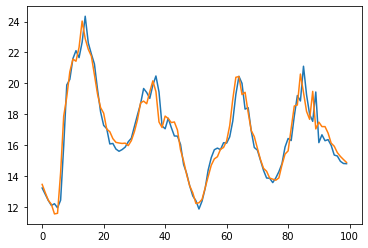

In [106]:
plot_predictions(model4, X2_test, y2_test)

In [146]:
# predict pressure as well as temp

In [147]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [148]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]]  [t6]
# [[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]]  [t7]


def df_to_X_y_3(df, window_size=7): # 7 = features+labels
    # window_size is the number of samples to take
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]  # this creates the list of list
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]] # 0 = pressure, 1=Temperature
        y.append(label)
    return np.array(X), np.array(y)

In [149]:
X3,y3 = df_to_X_y_3(p_temp_df)

In [150]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, 



((60000, 7, 6), (60000, 2))

In [151]:
p_training_mean3 = np.mean(X3_train[:,:,0])
p_training_std3 = np.std(X3_train[:,:,0])

temp_training_mean3 = np.mean(X3_train[:,:,1])
temp_training_std3 = np.std(X3_train[:,:,1])


In [152]:
def preprocess3(X):
    X[:,:,0] = (X[:,:,0]-p_training_mean3)/p_training_std3
    X[:,:,1] = (X[:,:,0]-temp_training_mean3)/temp_training_std3

In [153]:
def preprocess_output(y):
    y[:,0] = (y[:,0] - p_training_mean3)/p_training_std3
    y[:,1] = (y[:,1] - temp_training_mean3)/temp_training_std3

In [154]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [155]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

In [156]:
y3_train

array([[ 1.2365063 , -2.05933485],
       [ 1.29956313, -2.00761894],
       [ 1.36989575, -1.93474652],
       ...,
       [ 0.59502431,  0.71922016],
       [ 0.60472536,  0.54056518],
       [ 0.61927694,  0.49942752]])

In [157]:
X3_train.shape

(60000, 7, 6)

In [158]:
X3_train.shape[1:]

(7, 6)

In [159]:
model5 = Sequential()
model5.add(InputLayer(input_shape=X3_train.shape[1:])) # 7 timesteps or window_size, 6 columns/features
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                18176     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [160]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])



Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6015 - root_mean_squared_error: 0.7755

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 6ms/step - loss: 0.6015 - root_mean_squared_error: 0.7755 - val_loss: 0.5984 - val_root_mean_squared_error: 0.7736
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5857 - root_mean_squared_error: 0.7653

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5857 - root_mean_squared_error: 0.7653 - val_loss: 0.5984 - val_root_mean_squared_error: 0.7736
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5849 - root_mean_squared_error: 0.7648 - val_loss: 0.6041 - val_root_mean_squared_error: 0.7773
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5842 - root_mean_squared_error: 0.7643 - val_loss: 0.5987 - val_root_mean_squared_error: 0.7737
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5835 - root_mean_squared_error: 0.7639 - val_loss: 0.6034 - val_root_mean_squared_error: 0.7768
Epoch 6/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.5827 - root_mean_squared_error: 0.7634

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5830 - root_mean_squared_error: 0.7635 - val_loss: 0.5963 - val_root_mean_squared_error: 0.7722
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5826 - root_mean_squared_error: 0.7633

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5825 - root_mean_squared_error: 0.7632 - val_loss: 0.5958 - val_root_mean_squared_error: 0.7719
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5821 - root_mean_squared_error: 0.7629

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5821 - root_mean_squared_error: 0.7629 - val_loss: 0.5951 - val_root_mean_squared_error: 0.7714
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5817 - root_mean_squared_error: 0.7627 - val_loss: 0.6016 - val_root_mean_squared_error: 0.7756
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.5816 - root_mean_squared_error: 0.7626

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5814 - root_mean_squared_error: 0.7625 - val_loss: 0.5925 - val_root_mean_squared_error: 0.7698
